# Loan Prediction Problem Dataset

- Prepared by Souha Cherif and Ouahbi Haj Kacem

- Dataset: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset

### Loan Approval Prediction Using Machine Learning

- In this Notebook, we are going to solve the Loan Approval Prediction. This is a classification problem in which we need to classify whether the loan will be approved or not. Classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. A few examples of classification problems are Spam Email detection, Cancer detection, Sentiment Analysis, etc.

### Understanding the Problem Statement

- A loan is a bank's main source of revenue. The profits earned through loans account for most of the bank's profits. Even though the bank accepts the loan following a lengthy verification and testimony process, there is no guarantee that the chosen candidate is the right one. When done manually, this operation takes a long time. We can predict whether a given hopeful is safe or not, and the entire testimonial process is automated using machine literacy. Loan Prognostic is beneficial to both bank retainers and hopefuls.


- The Bank wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out online application forms. These details are Gender, Marital Status, Education, number of Dependents, Income, Loan Amount, Credit History, and others.


- To automate this process, they have provided a dataset to identify the customer segments that are eligible for loan amounts so that they can specifically target these customers.


- As mentioned above this is a Binary Classification problem in which we need to predict our Target label which is “Loan Status”.


- Loan status can have two values: Yes or No.

 - Yes: if the loan is approved
 - No: if the loan is not approved

### Loading Essential Python Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OrdinalEncoder

import scipy.stats as ss
from scipy import stats 
from scipy.stats import skew, boxcox_normmax, norm
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

### Loading the train dataset

In [2]:
train = pd.read_csv("C:\\Users\\wahby\\Desktop\\loan-prediction-problem-dataset\\train.csv")

### Loading the test dataset

In [3]:
test = pd.read_csv("C:\\Users\\wahby\\Desktop\\loan-prediction-problem-dataset\\test.csv")

## Exploratory Data Analysis (EDA) & Data-Preprocessing 

##### Understanding the Dataset 

In [4]:
# Size of Train Data
train.shape

(614, 13)

- We have 614 rows and 13 columns in our training dataset.

In [5]:
# Size of Test Data
test.shape

(367, 12)

- In test data, we have 367 rows and 12 columns because the target column is not included in the test data.

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


- We can observe from the above top 5 entries that there are object and numeric data types in our dataset.        
- There are null values in our data which needs to be handled before we start building our model.              
- Loan Status is our target columns which needs to be predicted based on the remaining independent features of our data.

In [7]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
# Getting informations about the data types, missing values and column names of the dataset.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- Above information reflects that our dataset has 5 numerical and 8 object columns.                   
- There are null values in multiple columns which needs to be handled.                     
- There are total 13 columns in our dataset with 614 entries. 
- There are missing values in some columns like Dependents, Gender, Self_Employed, etc

In [9]:
numerical_columns = train.dtypes[train.dtypes != 'object'].index
numerical_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [10]:
categorical_columns = train.dtypes[train.dtypes == 'object'].index
categorical_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
# Getting descriptive statistics on the numeric variables in the dataset.
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


##### Search for duplicate values 

In [12]:
train.duplicated().sum()

0

In [13]:
test.duplicated().sum()

0

##### Search for missing values 

In [14]:
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

- There are missing values in the following features:- 'Credit_History', 'Self_Employed', 'LoanAmount', 'Dependents', 'Loan_Amount_Term', 'Gender', 'Married'.

In [15]:
test.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

- There are missing values in the following features:- 'Credit_History', 'Self_Employed', 'Gender', 'Dependents', 'Loan_Amount_Term', 'LoanAmount'.

##### Column Removal or Column Dropping "Loan_ID"

- Removing the "Loan_ID" column as its a noise for our model and has no impact on the target 

In [16]:
train.drop('Loan_ID',axis=1,inplace=True)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##### Checking unique values in our dataset for better understanding 

In [17]:
train.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

##### Checking the description of our data to check for skewness and distribution

In [18]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- There appears to be high positive skewness in Dependents, Applicant Income, Co-Applicant Income, Loan Amount, where there may be potential outliers, which should be checked.                                       
- Loan Amount and credit history have negative skewness.

### Checking for outliers 

<Figure size 720x288 with 0 Axes>

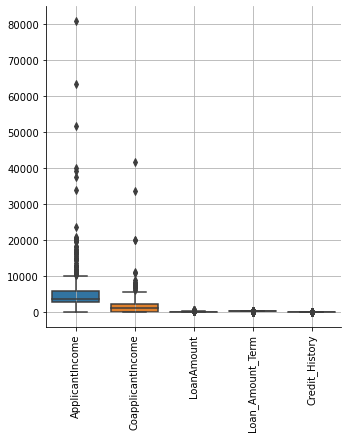

In [19]:
plt.figure(figsize=(10,4))
sns.catplot(data=train,kind='box')
plt.xticks(rotation=90)
plt.grid()
plt.show()

- There seems to be outliers in applicant income and coapplicant income which needs to be taken into consideration.

### Univariate Analysis: Numerical Features

In [20]:
# Distribution Plot / Histogram
for col in numerical_columns:
    print("Skewness of ", col,": " , train[col].skew());
    print("Kurtosis of ",col,": " , train[col].kurtosis());
    print("---------------------------")

Skewness of  ApplicantIncome :  6.539513113994625
Kurtosis of  ApplicantIncome :  60.54067593369113
---------------------------
Skewness of  CoapplicantIncome :  7.491531216657306
Kurtosis of  CoapplicantIncome :  84.95638421103374
---------------------------
Skewness of  LoanAmount :  2.677551679256059
Kurtosis of  LoanAmount :  10.40153349029416
---------------------------
Skewness of  Loan_Amount_Term :  -2.362414124216269
Kurtosis of  Loan_Amount_Term :  6.673473692814259
---------------------------
Skewness of  Credit_History :  -1.8823610612186696
Kurtosis of  Credit_History :  1.5487626683496112
---------------------------


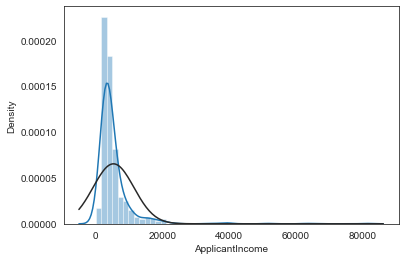

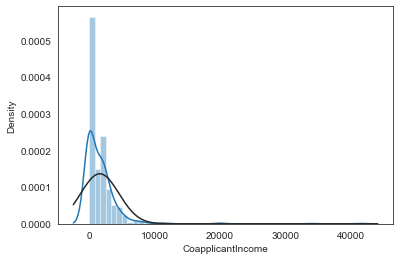

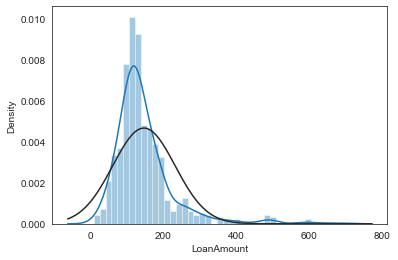

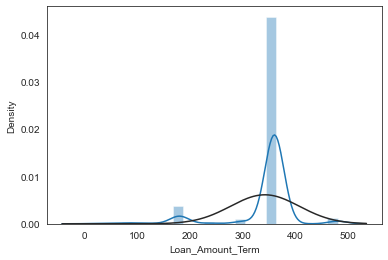

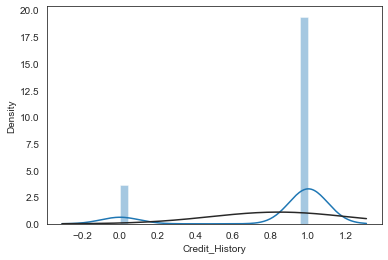

In [21]:
for col in numerical_columns:  
    sns.set_style('white');
    plt.figure();
    sns.distplot(train[col], fit = norm);

- Features such as ApplicantIncome & Coapplicant Income are highly skewed (positively), could be normalized using Log Transformation
- LoanAmount is also positively skewed, can be normalized using Log Transformation

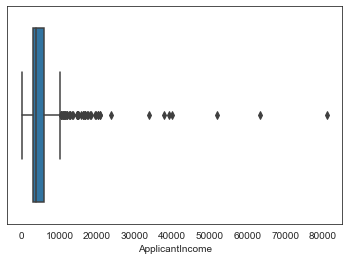

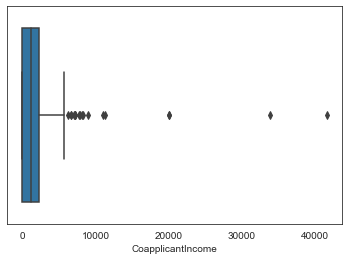

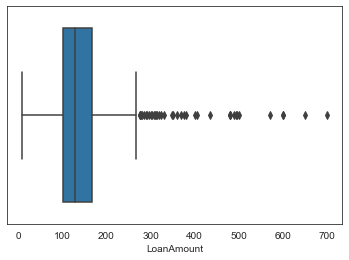

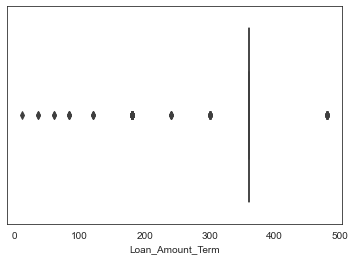

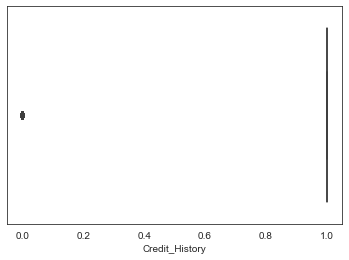

In [22]:
# Box Plots
for col in numerical_columns:
    sns.set_style('white');
    plt.figure();
    sns.boxplot(train[col]);

In [23]:
print(train['Credit_History'].unique())
print("---"*30)
print(train['Loan_Amount_Term'].unique())

[ 1.  0. nan]
------------------------------------------------------------------------------------------
[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


- Feature Credit_History must be a categorical feature as it only holds values 1 & 0
- Loan_Amount_Term can also be labeled as a categorical feature
- CoapplicantIncome & ApplicantIncome are a highly disperesed features

### Bi-Variate Analysis: Continuous vs. Continuous

In [24]:
# Converting Loan_Amount_Term & Credit_History to categorical features
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype(object)
train['Credit_History'] = train['Credit_History'].astype(object)

In [25]:
# Updating numerical and categorical columns
numerical_columns = train.dtypes[train.dtypes != 'object'].index
numerical_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')

In [26]:
categorical_columns = train.dtypes[train.dtypes == 'object'].index
categorical_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

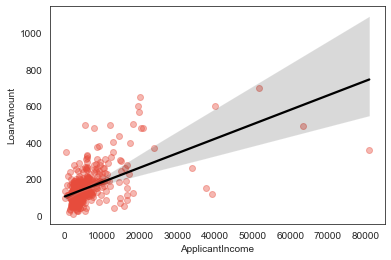

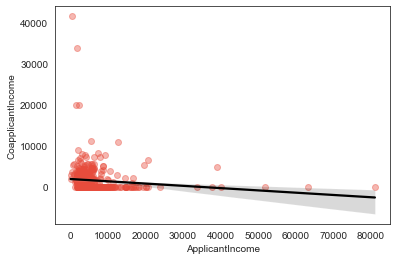

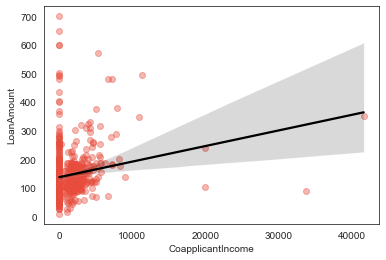

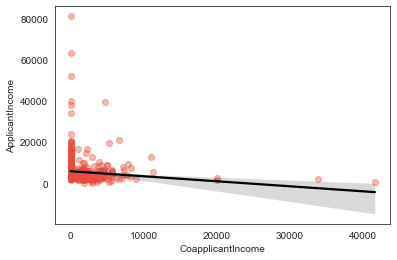

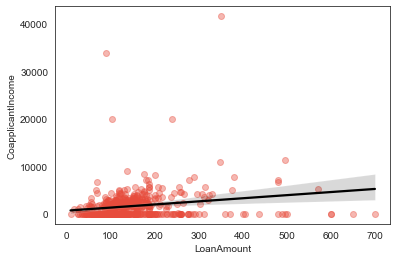

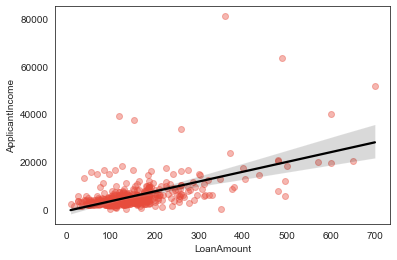

<Figure size 432x288 with 0 Axes>

In [27]:
def srt_reg(df):
    for i in train[[col for col in numerical_columns]]:
        for k in train[[col for col in numerical_columns[::-1]]]:
            if i == k:
                continue;
            sns.regplot(x=i, y=k, data=df, color='#e74c3c', line_kws={'color': 'black'}, scatter_kws={'alpha':0.4})
            plt.figure();
            
srt_reg(train)

- LoanAmount and ApplicantIncome follow a linear relationship.
- Most of the Coapplicant income is equal to 0, which must be taken into account as it biases our data, otherwise it is linearly related to the loan amount.

In [28]:
print("Number of rows with 0 CoapplicantIncome: ", train.CoapplicantIncome.value_counts()[0])
print("Percentage:", (train.CoapplicantIncome.value_counts()[0]/train.CoapplicantIncome.count()*100))

Number of rows with 0 CoapplicantIncome:  273
Percentage: 44.462540716612374


### Bi-Variate Analysis: Categorical vs. Categorical

##### Counting frequency of categories for each categorical features

In [29]:
data = [train,test]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    # Exclude ID cols and source:
    categorical_columns = [x for x in categorical_columns if x not in ['Loan_ID' ]]
    #Print frequency of categories
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (train[col].value_counts())


Frequency of Categories for variable Gender
Male      489
Female    112
Name: Gender, dtype: int64

Frequency of Categories for variable Married
Yes    398
No     213
Name: Married, dtype: int64

Frequency of Categories for variable Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency of Categories for variable Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency of Categories for variable Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

Frequency of Categories for variable Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [30]:
# Comparison of loan status
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [31]:
# Get the value counts of Loan_Status and calculate the normalized values
data = train['Loan_Status'].value_counts(normalize=True)*100
data

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

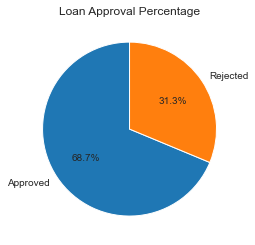

In [32]:
# Create a list of labels for the pie chart
labels = ['Approved', 'Rejected']

# Create a list of colors for the pie chart
colors = ['#1f77b4', '#ff7f0e']

# Create the pie chart
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title to the chart
plt.title('Loan Approval Percentage')

# Show the chart
plt.show()

- Loan_Status is our target variable that appears to be unbalanced as it is in a 1:3 ratio, which must be corrected for our model to make accurate predictions.

### Gender

In [33]:
# Comparison of loan status based on gender
train.groupby("Gender")['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: Loan_Status, dtype: int64

In [34]:
# Group the data by Gender and Loan_Status and calculate the normalized value counts
data = train.groupby("Gender")['Loan_Status'].value_counts(normalize=True)*100
data

Gender  Loan_Status
Female  Y              66.964286
        N              33.035714
Male    Y              69.325153
        N              30.674847
Name: Loan_Status, dtype: float64

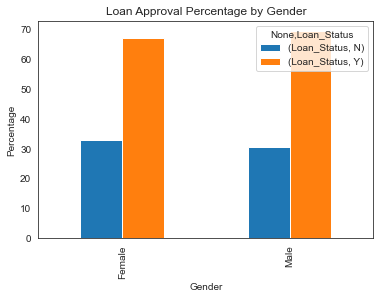

In [35]:
# Convert the data into a DataFrame and unstack it to create a pivot table
data = data.to_frame().unstack()

# Plot the data as a bar chart
data.plot(kind='bar')

# Set the chart title and axis labels
plt.title('Loan Approval Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')

# Show the chart
plt.show()

- Males and females have the same chances to get a loan. 

### Marital Status

In [36]:
# Comparison of loan approvals based on Marital Status
train.groupby("Married")["Loan_Status"].value_counts()

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              285
         N              113
Name: Loan_Status, dtype: int64

In [37]:
# Group the data by Married and Loan_Status and calculate the normalized value counts
data = train.groupby("Married")["Loan_Status"].value_counts(normalize=True)*100
data

Married  Loan_Status
No       Y              62.910798
         N              37.089202
Yes      Y              71.608040
         N              28.391960
Name: Loan_Status, dtype: float64

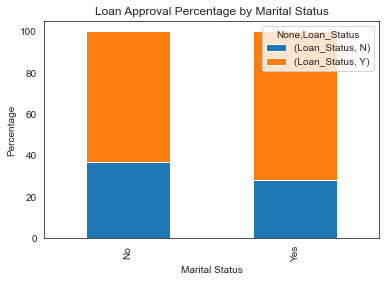

In [38]:
# Convert the data into a DataFrame and unstack it to create a pivot table
data = data.to_frame().unstack()

# Plot the data as a stacked bar chart
data.plot(kind='bar', stacked=True)

# Set the chart title and axis labels
plt.title('Loan Approval Percentage by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')

# Show the chart
plt.show()

- Married and unmarried individuals have nearly the same percentage of bank loans: 72% for married individuals and 63% for unmarried individuals.

### Dependents

In [39]:
# Group the data by Dependents and Loan_Status and calculate the normalized value counts
data = train.groupby("Dependents")["Loan_Status"].value_counts(normalize=True)*100
data

Dependents  Loan_Status
0           Y              68.985507
            N              31.014493
1           Y              64.705882
            N              35.294118
2           Y              75.247525
            N              24.752475
3+          Y              64.705882
            N              35.294118
Name: Loan_Status, dtype: float64

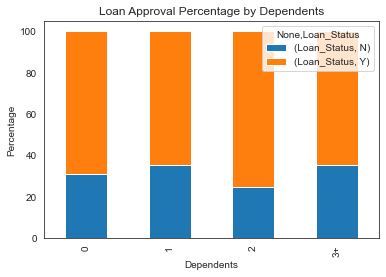

In [40]:
# Convert the data into a DataFrame and unstack it to create a pivot table
data = data.to_frame().unstack()

# Plot the data as a stacked bar chart
data.plot(kind='bar', stacked=True)

# Set the chart title and axis labels
plt.title('Loan Approval Percentage by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Percentage')

# Show the chart
plt.show()

- People with two dependents are more likely to get a loan with a 75% percentage.
- People with 0 dependents, 1 dependent, 3 or more dependents have almost the same percentage of bank loans.

### Education Level

In [41]:
# Comparison of loan approvals based on education level
train.groupby("Education")["Loan_Status"].value_counts()

Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
Name: Loan_Status, dtype: int64

In [42]:
# Group the data by Education and Loan_Status and calculate the normalized value counts
data = train.groupby("Education")["Loan_Status"].value_counts(normalize=True)*100
data

Education     Loan_Status
Graduate      Y              70.833333
              N              29.166667
Not Graduate  Y              61.194030
              N              38.805970
Name: Loan_Status, dtype: float64

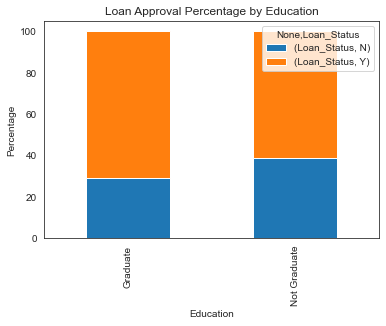

In [43]:
# Convert the data into a DataFrame and unstack it to create a pivot table
data = data.to_frame().unstack()

# Plot the data as a stacked bar chart
data.plot(kind='bar', stacked=True)

# Set the chart title and axis labels
plt.title('Loan Approval Percentage by Education')
plt.xlabel('Education')
plt.ylabel('Percentage')

# Show the chart
plt.show()

- Graduates are eligible for a loan compared to non-graduates.

### Self-employment Status

In [44]:
# Comparison of loan approvals based on self-employment status
train.groupby("Self_Employed")["Loan_Status"].value_counts()

Self_Employed  Loan_Status
No             Y              343
               N              157
Yes            Y               56
               N               26
Name: Loan_Status, dtype: int64

In [45]:
# Group the data by Self_Employed and Loan_Status and calculate the normalized value counts
data = train.groupby("Self_Employed")["Loan_Status"].value_counts(normalize=True)*100
data

Self_Employed  Loan_Status
No             Y              68.600000
               N              31.400000
Yes            Y              68.292683
               N              31.707317
Name: Loan_Status, dtype: float64

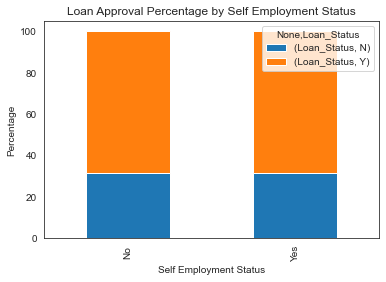

In [46]:
# Convert the data into a DataFrame and unstack it to create a pivot table
data = data.to_frame().unstack()

# Plot the data as a stacked bar chart
data.plot(kind='bar', stacked=True)

# Set the chart title and axis labels
plt.title('Loan Approval Percentage by Self Employment Status')
plt.xlabel('Self Employment Status')
plt.ylabel('Percentage')

# Show the chart
plt.show()

- Independents and non-independents are equally likely to get a loan, with 68% for both.

### Credit_History

In [47]:
# Comparison of loan approvals based on Credit_History
train.groupby("Credit_History")["Loan_Status"].value_counts()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              378
                N               97
Name: Loan_Status, dtype: int64

In [48]:
# Group the data by Credit_History and Loan_Status and calculate the normalized value counts
data = train.groupby("Credit_History")["Loan_Status"].value_counts(normalize=True)*100
data

Credit_History  Loan_Status
0.0             N              92.134831
                Y               7.865169
1.0             Y              79.578947
                N              20.421053
Name: Loan_Status, dtype: float64

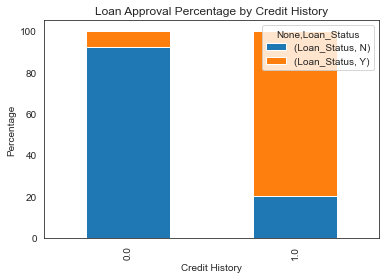

In [49]:
# Convert the data into a DataFrame and unstack it to create a pivot table
data = data.to_frame().unstack()

# Plot the data as a stacked bar chart
data.plot(kind='bar', stacked=True)

# Set the chart title and axis labels
plt.title('Loan Approval Percentage by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Percentage')

# Show the chart
plt.show()

- People with a credit history are more likely to get a loan from the bank.
- With better credit History the Loan amount given was greater too.

### Property Area

In [50]:
# Comparison of loan approvals based on Property_Area
train.groupby("Property_Area")["Loan_Status"].value_counts()

Property_Area  Loan_Status
Rural          Y              110
               N               69
Semiurban      Y              179
               N               54
Urban          Y              133
               N               69
Name: Loan_Status, dtype: int64

In [51]:
# Group the data by Property_Area and Loan_Status and calculate the normalized value counts
data = train.groupby("Property_Area")["Loan_Status"].value_counts(normalize=True)*100
data

Property_Area  Loan_Status
Rural          Y              61.452514
               N              38.547486
Semiurban      Y              76.824034
               N              23.175966
Urban          Y              65.841584
               N              34.158416
Name: Loan_Status, dtype: float64

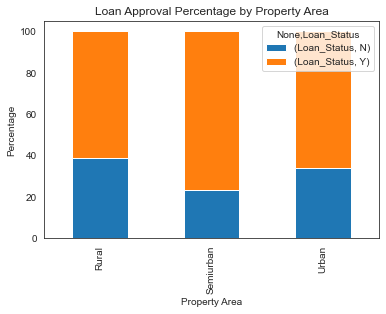

In [52]:
# Convert the data into a DataFrame and unstack it to create a pivot table
data = data.to_frame().unstack()

# Plot the data as a stacked bar chart
data.plot(kind='bar', stacked=True)

# Set the chart title and axis labels
plt.title('Loan Approval Percentage by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Percentage')

# Show the chart
plt.show()

- Residents of semi-urban areas are more likely to get a loan, with a percentage of 77%.
- Rural and urban residents have almost the same percentage of bank loans.

### Loan Amount Term

In [53]:
# Comparison of loan approvals based on Loan_Amount_Term

# Group the data by Loan_Amount_Term and Loan_Status and calculate the normalized value counts
data = train.groupby("Loan_Amount_Term")["Loan_Status"].value_counts(normalize=True)*100
data

Loan_Amount_Term  Loan_Status
12.0              Y              100.000000
36.0              N              100.000000
60.0              Y              100.000000
84.0              Y               75.000000
                  N               25.000000
120.0             Y              100.000000
180.0             Y               65.909091
                  N               34.090909
240.0             Y               75.000000
                  N               25.000000
300.0             Y               61.538462
                  N               38.461538
360.0             Y               70.117188
                  N               29.882812
480.0             N               60.000000
                  Y               40.000000
Name: Loan_Status, dtype: float64

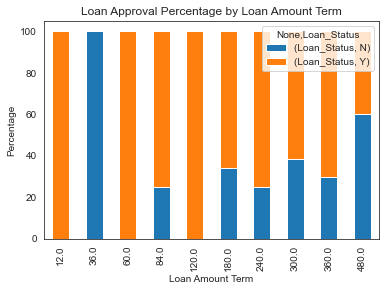

In [54]:
# Convert the data into a DataFrame and unstack it to create a pivot table
data = data.to_frame().unstack()

# Plot the data as a stacked bar chart
data.plot(kind='bar', stacked=True)

# Set the chart title and axis labels
plt.title('Loan Approval Percentage by Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Percentage')

# Show the chart
plt.show()

- People generally opt for a 12-month, 60-month or 120-month loan term and do not opt for a 36 month loan term.
- A high percentage of people opt for an 84-month, a 240-month or 360-month loan term, as opposed to those who opt for a 480-month loan term.

#### Comparison of Dependents based on Gender

In [55]:
# Group the data by Gender and Dependents and calculate the normalized value counts
data = train.groupby("Gender")["Dependents"].value_counts(normalize=True)*100
data

Gender  Dependents
Female  0             73.394495
        1             17.431193
        2              6.422018
        3+             2.752294
Male    0             54.088050
        2             19.287212
        1             17.190776
        3+             9.433962
Name: Dependents, dtype: float64

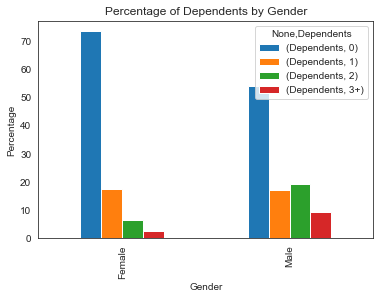

In [56]:
# Convert the data into a DataFrame and unstack it to create a pivot table
data = data.to_frame().unstack()

# Plot the data as a grouped bar chart
data.plot(kind='bar')

# Set the chart title and axis labels
plt.title('Percentage of Dependents by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')

# Show the chart
plt.show()

- Most females and males have no dependents with a 73% for females and 54% for males. 

#### Comparison of Dependents based on Marital status

In [57]:
# group the data by "Married" and "Dependents", calculate the percentage of each group, and multiply by 100
data = train.groupby("Married")["Dependents"].value_counts(normalize=True)*100
data 

Married  Dependents
No       0             81.818182
         1             11.004785
         2              3.827751
         3+             3.349282
Yes      0             44.615385
         2             23.846154
         1             20.256410
         3+            11.282051
Name: Dependents, dtype: float64

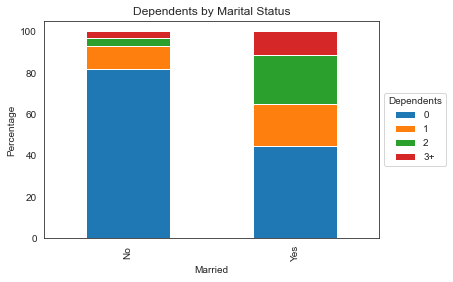

In [58]:
# unstack the "Dependents" index to create a dataframe with "Married" as the columns and "Dependents" as the rows
# this makes it easier to plot the data as a stacked bar chart
data.unstack().plot(kind='bar', stacked=True)

# add labels to the x-axis, y-axis, and plot title
plt.xlabel('Married')
plt.ylabel('Percentage')
plt.title('Dependents by Marital Status')

# add a legend to the plot that shows the number of dependents for each bar
plt.legend(title='Dependents', loc='center left', bbox_to_anchor=(1, 0.5))

# display the plot
plt.show()

- Unmarried individuals generally have no dependents (82%).
- Nearly half of married individuals (45%) do not have any dependents, while almost the same proportion of married individuals (44%) have one or two dependents.

#### Comparison of self-employment status based on education level

In [59]:
# group the data by "Education" and "Self_Employed", calculate the percentage of each group, and multiply by 100
data = train.groupby("Education")["Self_Employed"].value_counts(normalize=True)*100
data

Education     Self_Employed
Graduate      No               85.682819
              Yes              14.317181
Not Graduate  No               86.718750
              Yes              13.281250
Name: Self_Employed, dtype: float64

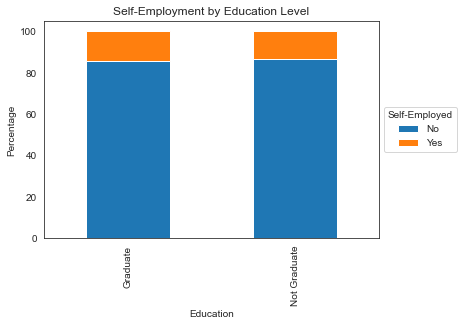

In [60]:
# unstack the "Self_Employed" index to create a dataframe with "Education" as the columns and "Self_Employed" as the rows
# this makes it easier to plot the data as a stacked bar chart
data.unstack().plot(kind='bar', stacked=True)

# add labels to the x-axis, y-axis, and plot title
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.title('Self-Employment by Education Level')

# add a legend to the plot that shows the self-employment status for each bar
plt.legend(title='Self-Employed', loc='center left', bbox_to_anchor=(1, 0.5))

# display the plot
plt.show()

- Both graduates and non-graduates are non-independent workers.

In [61]:
# Cross Tabulation between Loan_Status and other categorical features
def cross_tab(col, df):
    cat = df.dtypes[train.dtypes == 'object'].index
    for i in cat:
        if i == col:
            continue;
        print(pd.crosstab(index = train[i], columns = train[col], normalize='index'))
        print("----"*30)

In [62]:
# Performing Chi-Square Test between Loan_Status and other features
def chi_sq(col, df):
    cat = df.dtypes[train.dtypes == 'object'].index
    for i in cat:
        if i == col:
            continue;
        cross = pd.crosstab(index = train[i], columns = train[col])
        chisq_res = chi2_contingency(cross)
        print("p - value for test between ", col, " and ", i, " is:", chisq_res[1])
        if chisq_res[1] > 0.05: 
            print(col, " and ", i, " are not correlated.")
        else:
            print(col, " and ", i, " are correlated.")
        print("----"*30)

chi_sq('Loan_Status', train)

p - value for test between  Loan_Status  and  Gender  is: 0.7086529816451106
Loan_Status  and  Gender  are not correlated.
------------------------------------------------------------------------------------------------------------------------
p - value for test between  Loan_Status  and  Married  is: 0.03439381301579988
Loan_Status  and  Married  are correlated.
------------------------------------------------------------------------------------------------------------------------
p - value for test between  Loan_Status  and  Dependents  is: 0.3678506740863211
Loan_Status  and  Dependents  are not correlated.
------------------------------------------------------------------------------------------------------------------------
p - value for test between  Loan_Status  and  Education  is: 0.04309962129357355
Loan_Status  and  Education  are correlated.
------------------------------------------------------------------------------------------------------------------------
p - value for 

- Loan_Status is correlated with some features especially with Credit_History and Property_Area.
- Loan_Status is not correlated with features such as Self_Employed, Loan_Amount_Term, Dependents and Gender

### Bi-Variate Analysis: Continuous vs. Categorical

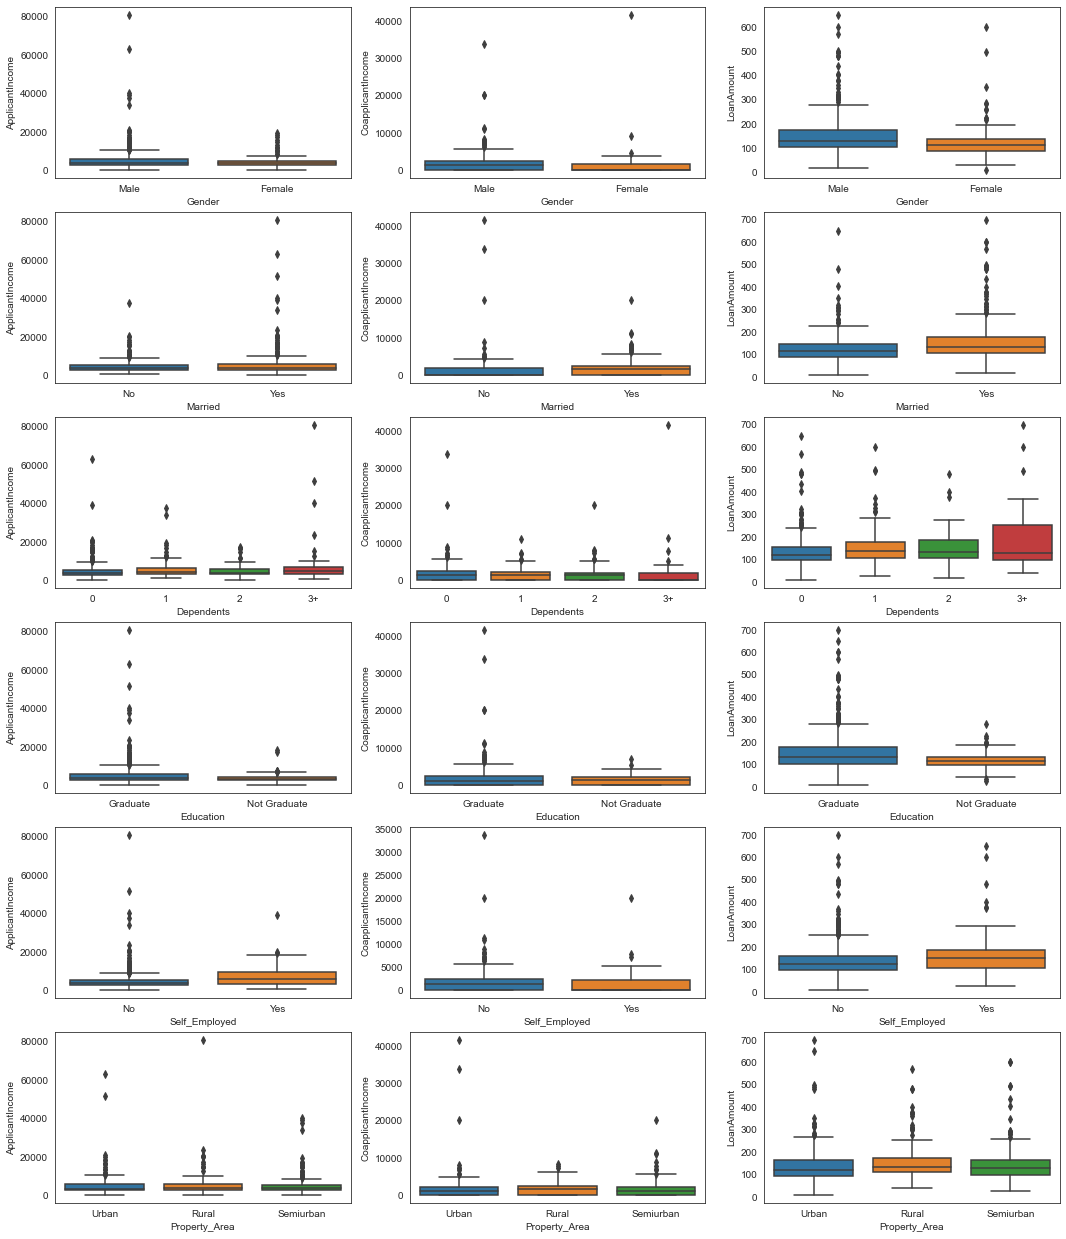

In [63]:
# Box Plots
def srt_box(df):
    fig, axes = plt.subplots(len(categorical_columns), len(numerical_columns), figsize=(18, 22))
    for i, numerical_col in enumerate(numerical_columns):
        for j, categorical_col in enumerate(categorical_columns):
            sns.boxplot(x=categorical_col, y=numerical_col, data=df, ax=axes[j][i])
    plt.show()

srt_box(train)

- There are some male applicants which have high ApplicantIncome, which may be classified as outliers.
- Graduate Applicants have high ApplicantIncome.
- Self Employed applicants also have higher income.
- Some Female & Male co-applicants have exceptionally high CoapplicantIncome, therefore might be outliers.
- Male applicants have greater LoanAmount.
- Married applicants also have greater LoanAmount than Unmarried applicants.
- Loan Amount has a linear relationship with the number of Dependents, as number of dependents increase, loan amount increases.
- Graduate Applicants have high LoanAmount.

### Handling Missing Values: Categorical & Numerical Features

##### Finding the mode for object datatype which can be used to replace the null values

In [64]:
print('1/ Gender Mode: ', train['Gender'].mode())
print('2/ Married Mode: ', train['Married'].mode())
print('3/ Self Employed Mode: ', train['Self_Employed'].mode())
print('4/ Dependents Mode: ', train['Dependents'].mode())
print('5/ Credit History Mode: ', train['Credit_History'].mode())

1/ Gender Mode:  0    Male
Name: Gender, dtype: object
2/ Married Mode:  0    Yes
Name: Married, dtype: object
3/ Self Employed Mode:  0    No
Name: Self_Employed, dtype: object
4/ Dependents Mode:  0    0
Name: Dependents, dtype: object
5/ Credit History Mode:  0    1.0
Name: Credit_History, dtype: object


##### Creating a bar plot using the Seaborn library 

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

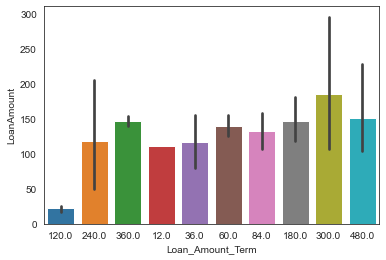

In [65]:
sns.barplot(x = train['Loan_Amount_Term'], y = train['LoanAmount'])

- The above visualization allows us to observe a certain correlation between the amount of the loan and the term, the higher the amount of the loan, the longer the term, but there are some exceptions, as in the case of an amount of 25k, the term is 120 months.

##### Search for missing values

In [66]:
train.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

- There are missing values in the following features:- 'Credit_History', 'Self_Employed', 'LoanAmount', 'Dependents', 'Loan_Amount_Term', 'Gender', 'Married'.

In [67]:
# % of missing values
round((train.isna().sum() / len(train) * 100), 2).sort_values(ascending=False)

Credit_History       8.14
Self_Employed        5.21
LoanAmount           3.58
Dependents           2.44
Loan_Amount_Term     2.28
Gender               2.12
Married              0.49
Education            0.00
ApplicantIncome      0.00
CoapplicantIncome    0.00
Property_Area        0.00
Loan_Status          0.00
dtype: float64

##### Boolean Indexing

In [68]:
train[['Loan_Amount_Term', 'LoanAmount']][train['Loan_Amount_Term'].isnull()]

,Loan_Amount_Term,LoanAmount
19,NaN,115.0
36,NaN,100.0
44,NaN,96.0
45,NaN,88.0
73,NaN,95.0
112,NaN,152.0
165,NaN,182.0
197,NaN,120.0
223,NaN,175.0
232,NaN,120.0


##### Quick overview of the distribution of values

In [69]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

- 3+ is an invalid value entered which is making this int column as object which needs to be corrected and converted into numeric data type.

##### Value Substitution

In [70]:
train['Dependents'].replace('3+',3,inplace=True)
train['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

##### Boolean Indexing

In [71]:
train[['Dependents','Married']][train['Dependents'].isnull()]

,Dependents,Married
102,NaN,Yes
104,NaN,NaN
120,NaN,Yes
226,NaN,Yes
228,NaN,NaN
293,NaN,No
301,NaN,Yes
332,NaN,No
335,NaN,Yes
346,NaN,Yes


##### Computing the number of distinct values in each column

In [72]:
train.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

### Missing value imputation

- Replacing missing values with the mode is appropriate for categorical variables, such as "Gender", "Married", "Self_Employed", "Credit_History" and "Dependents", because these variables have a limited number of possible values. In this case, the mode represents the most common value in the column, and it is a reasonable estimate for what the missing values might be.

##### Filling the missing value of categorical data

In [73]:
train['Gender'].fillna('Male',inplace=True) 
#We fill in the missing values with mode because gender only has 2 unique values and replacing it with mode would not affect the model performance.

train['Married'].fillna('Yes',inplace=True) 
#We replace with mode because marital status has 2 values and replacing with mode would not change the performance of the model.

train['Self_Employed'].fillna('No',inplace=True) 
#We replace with mode because the self-employed status has 2 values and replacing with mode would not influence the model performance.

train['Dependents'].fillna(0,inplace=True) 
#The dependents status has 4 unique values so the best idea is to replace with the mode which is the most common value in the column.

train['Credit_History'].fillna(1.0,inplace=True) 
#We replace the NaN values of the credit history with the mode because the credit history has only 2 unique values and replacing it with the mode would not affect the model performance.

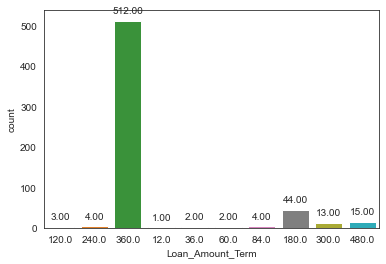

In [74]:
splot = sns.countplot(x ='Loan_Amount_Term', data = train)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- In our case, we are replcing NaN values of Loan_Amount_Term with mode because 360 has the highest number of occurence

In [75]:
print('Loan Amount Term Mode: ', train['Loan_Amount_Term'].mode()) 

Loan Amount Term Mode:  0    360.0
Name: Loan_Amount_Term, dtype: object


In [76]:
train['Loan_Amount_Term'] = train["Loan_Amount_Term"].fillna(train['Loan_Amount_Term'].mode()[0])

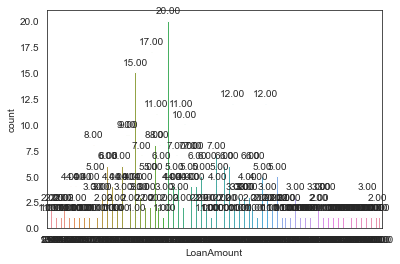

In [77]:
splot = sns.countplot(x ='LoanAmount', data = train)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- Here we can't replace null values with the mode.
- Here, the mean or median will be a better option. 
- We need to check for outliers before replacing NaN values with the mean or median.

In [78]:
null_value_train = pd.DataFrame(train[[col for col in numerical_columns]].isnull().sum()).reset_index()
null_value_train = null_value_train.rename(columns = {'index': 'Column Name', 0: 'Number of Null Values'}, inplace = False)
null_value_train['Percentage of Null Values'] = (null_value_train['Number of Null Values']/len(train)*100) 
null_value_train.sort_values(by = 'Percentage of Null Values', ascending = False).head()

,Column Name,Number of Null Values,Percentage of Null Values
2,LoanAmount,22,3.583062
0,ApplicantIncome,0,0.000000
1,CoapplicantIncome,0,0.000000


- Null Values in LoanAmount
- Loan amount is directly proportional with ApplicantIncome
- Loan amount is directly proportional with number of dependents
- Married couples have high LoanAmount
- Male Applicants have higher LoanAmount
- Graduate Applicants have hight LoanAmount

In [79]:
null_loanamt = train[train['LoanAmount'].isnull()]

In [80]:
# ChiSquared for LoanAmount
def cramers_v(x, y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

for i in categorical_columns: 
    print(i, ":")
    print(cramers_v(train['LoanAmount'], train[i]))
    print("---"*15)
print("Loan_Amount_Term", ":")
print(cramers_v(train['LoanAmount'], train['Loan_Amount_Term']))
print("---"*15)
print("Credit_History", ":")
print(cramers_v(train['LoanAmount'], train['Credit_History']))
print("---"*15)
print("Loan_Status", ":")
print(cramers_v(train['LoanAmount'], train['Loan_Status']))

print("***"*30)

for i in numerical_columns: 
    print(i, ":")
    print(cramers_v(train['LoanAmount'], train[i]))
    print("---"*15)

Gender :
0.0
---------------------------------------------
Married :
0.1000365003041953
---------------------------------------------
Dependents :
0.0
---------------------------------------------
Education :
0.0
---------------------------------------------
Self_Employed :
0.09684164251580472
---------------------------------------------
Property_Area :
0.11176338722143568
---------------------------------------------
Loan_Amount_Term :
0.0574217111206843
---------------------------------------------
Credit_History :
0.12012779172474554
---------------------------------------------
Loan_Status :
0.057951913642535546
******************************************************************************************
ApplicantIncome :
0.1441249787392782
---------------------------------------------
CoapplicantIncome :
0.0
---------------------------------------------
LoanAmount :
1.0
---------------------------------------------


- LoanAmount is correlated strongly with Applicant Income, Credit_History, Property_Area, Married and Self_Employed.

##### Checking for outliers in "LoanAmount"

In [81]:
Q1 = train['LoanAmount'].quantile(0.25)
Q3 = train['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

In [82]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('Low_limit is', low_lim)
print('Up_limit is', up_lim)

Low_limit is -2.0
Up_limit is 270.0


In [83]:
outliers = []
for x in train['LoanAmount']:
    if ((x > up_lim) or (x < low_lim)):
         outliers.append(x)
print('The following is a list of outliers present in the dataset:', outliers)

The following is a list of outliers present in the dataset: [349.0, 315.0, 320.0, 286.0, 312.0, 370.0, 650.0, 290.0, 600.0, 275.0, 700.0, 495.0, 280.0, 279.0, 304.0, 330.0, 436.0, 480.0, 300.0, 376.0, 490.0, 308.0, 570.0, 380.0, 296.0, 275.0, 360.0, 405.0, 500.0, 480.0, 311.0, 480.0, 400.0, 324.0, 600.0, 275.0, 292.0, 350.0, 496.0]


In [84]:
len(outliers)

39

- 6.5% of the data are outliers, so we will not remove the outliers from the dataset.


- We will replace the NaN values with the median because the median is not affected by the outliers.

In [85]:
train['LoanAmount'] = train.groupby('Dependents')['LoanAmount'].transform(lambda x: x.fillna(x.median()))

##### Missing Value Detection

In [86]:
train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- Missing values has now been handled.

##### DataType conversion

In [87]:
train['Dependents']=train['Dependents'].astype('int64')
train['Dependents'].dtype

dtype('int64')

##### Fetching all object data type columns to covert

In [88]:
obj_cols=train.select_dtypes('object').columns
obj_cols

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

### Data encoding

In [89]:
oe = OrdinalEncoder()
train[obj_cols] = train[obj_cols].astype(str)
train[obj_cols] = oe.fit_transform(train[obj_cols])
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,120.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0


### Standardization

In [90]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train.iloc[:,:-1] = ss.fit_transform(train.iloc[:,:-1])
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,-0.306280,0.273231,0.411733,1.223298,1.0
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.211104,0.273231,0.411733,-1.318513,0.0
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.948719,0.273231,0.411733,1.223298,1.0
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.306280,0.273231,0.411733,1.223298,1.0
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.056443,0.273231,0.411733,1.223298,1.0


### Splitting dataset - Separating data and label

In [91]:
x = train.iloc[:,:-1] #Features
y = train.iloc[:,-1] #Target
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,-0.306280,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.211104,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.948719,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.306280,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.056443,0.273231,0.411733,1.223298


In [92]:
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)

{0.0: 192, 1.0: 422}


### Oversampling

In [93]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

# Générer un exemple d'ensemble de données déséquilibré
X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=42)

# Appliquer l'oversampling avec SMOTE
oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Vérifier les nouvelles proportions des classes
unique, counts = np.unique(y_resampled, return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)

{0: 947, 1: 947}


### Train-Test split on the dataset

In [94]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_resampled,y_resampled,random_state = 4, test_size = 0.25, stratify = y_resampled)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(1420, 20) (1420,) (474, 20) (474,)


## Making Machine Learning Models to choose the ideal one

In [95]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    train_accuracy = model.score(xtrain,ytrain)
    test_accuracy = model.score(xtest, ytest)
    print(str(model)[:-2], 'Accuracy')
    print('Accuracy : ', accuracy_score(ytest,ypred), "\nClassification Report : \n", classification_report(ytest, ypred), '\nConfusion Matrix : \n', confusion_matrix(ytest, ypred))
    print(f'Training Accuracy: {train_accuracy}\nTesting Accuracy: {test_accuracy}')
    print()
    print()
    return model

### Importing Libraries foe Accuracy score, Confusion Matrix and Classification Report

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 1. Using KNN (K-Nearest Neighbors)

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = mymodel(KNeighborsClassifier())

KNeighborsClassifier Accuracy
Accuracy :  0.8860759493670886 
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.77      0.87       237
           1       0.81      1.00      0.90       237

    accuracy                           0.89       474
   macro avg       0.91      0.89      0.88       474
weighted avg       0.91      0.89      0.88       474
 
Confusion Matrix : 
 [[183  54]
 [  0 237]]
Training Accuracy: 0.923943661971831
Testing Accuracy: 0.8860759493670886




### 2. Using SVM Model

In [98]:
from sklearn.svm import SVC
svc = mymodel(SVC())

SVC Accuracy
Accuracy :  0.9852320675105485 
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       237
           1       0.97      1.00      0.99       237

    accuracy                           0.99       474
   macro avg       0.99      0.99      0.99       474
weighted avg       0.99      0.99      0.99       474
 
Confusion Matrix : 
 [[230   7]
 [  0 237]]
Training Accuracy: 0.9950704225352113
Testing Accuracy: 0.9852320675105485




### 3. Using Decision Tree Model

In [99]:
from sklearn.tree import DecisionTreeClassifier
dt= mymodel(DecisionTreeClassifier())

DecisionTreeClassifier Accuracy
Accuracy :  0.9388185654008439 
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       237
           1       0.93      0.95      0.94       237

    accuracy                           0.94       474
   macro avg       0.94      0.94      0.94       474
weighted avg       0.94      0.94      0.94       474
 
Confusion Matrix : 
 [[219  18]
 [ 11 226]]
Training Accuracy: 1.0
Testing Accuracy: 0.9388185654008439




### 4. Using Logistic Regression Model

In [100]:
from sklearn.linear_model import LogisticRegression
lr = mymodel(LogisticRegression())

LogisticRegression Accuracy
Accuracy :  0.890295358649789 
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       237
           1       0.90      0.87      0.89       237

    accuracy                           0.89       474
   macro avg       0.89      0.89      0.89       474
weighted avg       0.89      0.89      0.89       474
 
Confusion Matrix : 
 [[215  22]
 [ 30 207]]
Training Accuracy: 0.8823943661971831
Testing Accuracy: 0.890295358649789




### 5. Using Gaussian Naïve Bayes Model

In [101]:
from sklearn.naive_bayes import GaussianNB
gnb = mymodel(GaussianNB())

GaussianNB Accuracy
Accuracy :  0.8924050632911392 
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       237
           1       0.93      0.85      0.89       237

    accuracy                           0.89       474
   macro avg       0.90      0.89      0.89       474
weighted avg       0.90      0.89      0.89       474
 
Confusion Matrix : 
 [[222  15]
 [ 36 201]]
Training Accuracy: 0.8746478873239436
Testing Accuracy: 0.8924050632911392




### 6. Using Random Forest Model

In [102]:
from sklearn.ensemble import RandomForestClassifier
rfc = mymodel(RandomForestClassifier(n_estimators = 80, max_depth = 10, min_samples_leaf = 12))

RandomForestClassifier(max_depth=10, min_samples_leaf=12, n_estimators=8 Accuracy
Accuracy :  0.919831223628692 
Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       237
           1       0.94      0.90      0.92       237

    accuracy                           0.92       474
   macro avg       0.92      0.92      0.92       474
weighted avg       0.92      0.92      0.92       474
 
Confusion Matrix : 
 [[223  14]
 [ 24 213]]
Training Accuracy: 0.9514084507042253
Testing Accuracy: 0.919831223628692




### 7. Using Artifical Neural Network (ANN)

In [103]:
import tensorflow as tf
tf.__version__

'2.11.0'

##### Initialising the ANN

In [104]:
ann = tf.keras.models.Sequential()

##### Adding the first input layer and first hidden layer

In [105]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

##### Creating a second hidden layer

In [106]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

##### Adding the output layer

In [107]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

##### Compiling the model

In [108]:
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

##### Training the model

In [109]:
ann.fit(xtrain,ytrain, batch_size =32, epochs =100)

Epoch 1/100
45/45 [==============================] - 1s 1ms/step - loss: 0.6584 - accuracy: 0.5930
Epoch 2/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6168 - accuracy: 0.6739
Epoch 3/100
45/45 [==============================] - 0s 931us/step - loss: 0.5748 - accuracy: 0.7324
Epoch 4/100
45/45 [==============================] - 0s 916us/step - loss: 0.5269 - accuracy: 0.7852
Epoch 5/100
45/45 [==============================] - 0s 944us/step - loss: 0.4783 - accuracy: 0.8092
Epoch 6/100
45/45 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.8401
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8577
Epoch 8/100
45/45 [==============================] - 0s 1ms/step - loss: 0.3474 - accuracy: 0.8746
Epoch 9/100
45/45 [==============================] - 0s 1ms/step - loss: 0.3195 - accuracy: 0.8852
Epoch 10/100
45/45 [==============================] - 0s 935us/step - loss: 0.2990 - accuracy: 0.8958
E

##### Predicting the test set result

In [110]:
y_pred = ann.predict(xtest)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),ytest.reshape(len(ytest),1)),1))

15/15 [==============================] - 0s 992us/step
[[0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]


##### Making the confusion matrix and accuracy score

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, y_pred)
print(cm)
accuracy_score(ytest, y_pred)

[[223  14]
 [  6 231]]


0.9578059071729957

##### 1. K-Nearest Neighbors (KNN):


- Accuracy: 0.886
- This model achieves a relatively high accuracy of 0.886. It performs well in terms of precision, recall, and F1-score for both classes (0 and 1). The model has a higher precision for class 1, indicating that it correctly identifies most positive cases. However, it has a lower recall for class 0, suggesting that it may misclassify some negative cases as positive. The confusion matrix shows that it misclassified 54 instances of class 0 as class 1.


##### 2. Support Vector Machine (SVM):

- Accuracy: 0.985
- The SVM model achieves an impressive accuracy of 0.985. It demonstrates high precision, recall, and F1-score for both classes, indicating a balanced performance. The confusion matrix shows only 7 misclassifications between the two classes. The model performs well in correctly identifying both positive and negative cases.

##### 3. Decision Tree:
- Accuracy: 0.939
- The Decision Tree model achieves a decent accuracy of 0.939. It shows good precision, recall, and F1-score for both classes, indicating balanced performance. The confusion matrix shows 18 misclassifications, mainly from class 0 to class 1. Overall, the model performs well in classifying instances from both classes.

##### 4. Logistic Regression:
- Accuracy: 0.890
- The Logistic Regression model achieves an accuracy of 0.890. It demonstrates good precision, recall, and F1-score for both classes, indicating balanced performance. However, it has a slightly lower precision and recall compared to other models. The confusion matrix shows 30 instances misclassified between the two classes.

##### 5. Gaussian Naïve Bayes:
- Accuracy: 0.892
- The Gaussian Naïve Bayes model achieves an accuracy of 0.892. It demonstrates good precision, recall, and F1-score for both classes, indicating balanced performance. The confusion matrix shows 36 instances misclassified between the two classes.

##### 6. Random Forest:
- Accuracy: 0.920
- The Random Forest model achieves a decent accuracy of 0.920. It shows good precision, recall, and F1-score for both classes, indicating balanced performance. The confusion matrix shows 14 instances misclassified between the two classes. Overall, the model performs well in classifying instances from both classes.

###### Overall, the SVM model stands out with the highest accuracy of 0.985 and performs well in terms of precision, recall, and F1-score for both classes. The Decision Tree, Random Forest, and Gaussian Naïve Bayes models also show good performance.